#Data exploration and preprocessing

In [28]:
#%pip install pandas
#%pip install matplotlib
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---------------------- ----------------- 163.8/294.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
data = pd.read_csv('Data/flights.csv')
data.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [14]:
data.shape

(300153, 12)

In [15]:
data.describe()

Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [17]:
data.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [25]:
print(min(data.duration.unique()))
max(data.duration.unique())


0.83


49.83

airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
stops ['zero' 'one' 'two_or_more']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class ['Economy' 'Business']
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


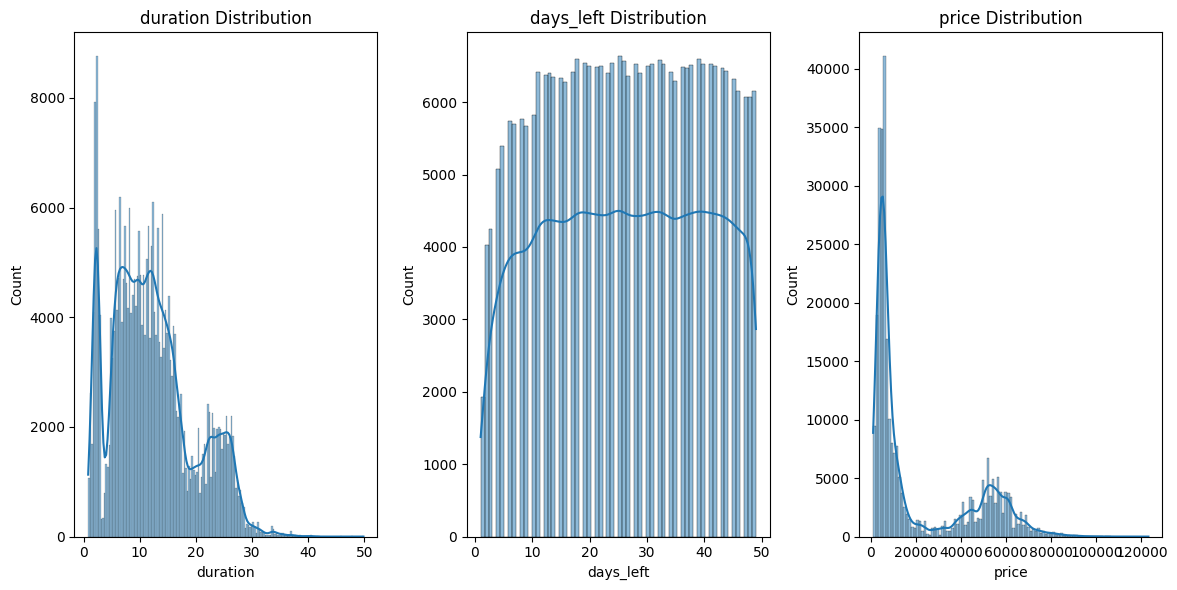

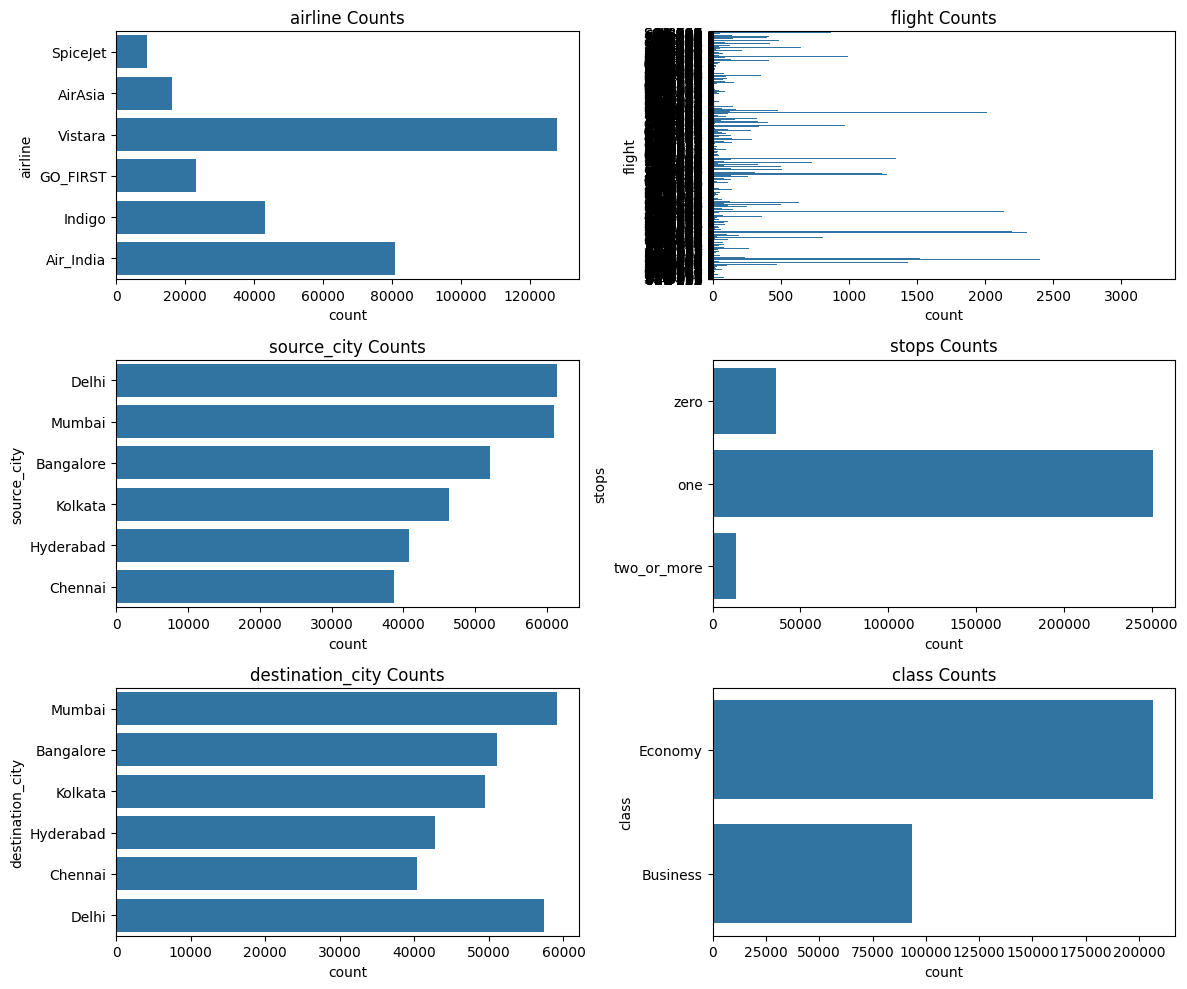

C:\Users\soukr\AppData\Local\Temp\ipykernel_12496\2972213832.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['departure_time'] = pd.to_datetime(data['departure_time'])


DateParseError: Unknown datetime string format, unable to parse: Evening, at position 0

<Figure size 1200x600 with 0 Axes>

In [32]:
# Display unique values for categorical columns
categorical_cols = ['airline', 'flight', 'source_city', 'stops', 'destination_city', 'class']
for col in categorical_cols:
    print(col, data[col].unique())

# Check for missing values
print(data.isnull().sum())

# Visualizations
# Histograms for numeric columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(['duration', 'days_left', 'price'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# Count Plots for categorical columns with reversed axes
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[col], orient='h')  # Reversed axes (y=data[col], orient='h')
    plt.title(f'{col} Counts')

plt.tight_layout()
plt.show()

# Time Series Plots (if applicable)
plt.figure(figsize=(12, 6))
data['departure_time'] = pd.to_datetime(data['departure_time'])
data['arrival_time'] = pd.to_datetime(data['arrival_time'])
data['departure_time'].value_counts().sort_index().plot()
plt.title('Departure Time Trends')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.figure(figsize=(12, 6))
data['arrival_time'].value_counts().sort_index().plot()
plt.title('Arrival Time Trends')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()